[Exercise description](https://drive.google.com/open?id=0B_TWylekorH3dUFRMXhhQjdDUE0)

[Scikits learn notes](https://drive.google.com/open?id=0B_TWylekorH3LWo0NllWWGFkNDQ)

## Understanding the challenge

v(n) - number of views after n hours.

### Note: 

- First look at data.csv The number of views vary from movie to movie. Some of them started from 0 and other not. Some movies had the same views in different months.

- Are the movies the same type? Do they vary between each other?

## 1) Read in the data.csv file and analyse the basic statistics of the v(n) or n = 24, 72, 168.

- calculate mean of v(24), variance of v(24), median, 1st quater and 3rd quater. Plot v(24) y axis and id x axis. the same for n = 72 and 168.
- plot mean( v(n) ). 
- plot linear fit for each of n.
- compare movies with highest views to lowest views. Calculate it for n = 24, 72 and 168. Plot resuts v(n) for each of them.
- Why there are differences between movie views? 
Maybe some of the movies stopped to be popular. 
Maybe some of the movies are more popular. 
- What is a source of data? How movies vary each other? Those are movies from single facebook page.
- Add slider in order to go through each of the movies v(n).

Some movies may become popular and other not. Why?
What is a characteristic of successful movie? What is a curve for successful movie?

In [83]:
import numpy as np
import pandas as pd
import pylab as py
from ipywidgets import *
import scipy.stats as sy
from sklearn import linear_model
%matplotlib inline

In [84]:
row_data_views = pd.read_csv( "./data.csv", header=None )
print row_data_views

                                 0       1       2       3       4       5    \
0    341163402640457_880901755333283       0   48059   61152   70036   77636   
1    341163402640457_880956415327817   41457   82351  121691  162281  202702   
2    341163402640457_880993045324154   54229   94312  125887  150893  171727   
3    341163402640457_881021215321337   61661  113998  156881  194734  225624   
4    341163402640457_881059645317494   22581   34326   42179   48756   54004   
5    341163402640457_881099615313497   20540   33373   42701   50692   57932   
6    341163402640457_881211871968938   25320   34662   40844   44902   48390   
7    341163402640457_881213071968818    9784   14718   16820   18857   20540   
8    341163402640457_881231368633655   33013   54891   70866   83587   95715   
9    341163402640457_881248731965252   19899   32366   41344   49673   59047   
10   341163402640457_881450058611786   52320   99506  143865  190600  238910   
11   341163402640457_881490075274451   4

Means

376765.517467
613303.341703
743209.837336


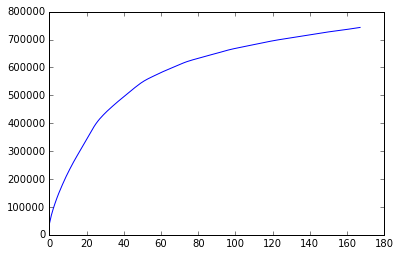

In [85]:
print row_data_views[24].mean()
print row_data_views[72].mean()
print row_data_views[168].mean()

py.plot( list( row_data_views.mean() ) ) 
py.show()

Means for v(n) n = 24, 72 and 168 doesn't seem to be linear with time. What may be cause of this?

Median

194357.5
237417.5
252287.0


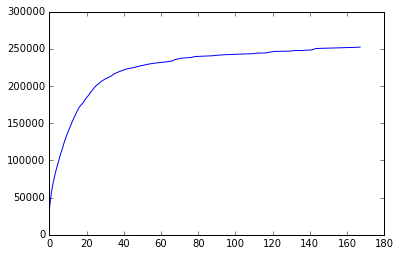

In [86]:
print row_data_views[24].median()
print row_data_views[72].median()
print row_data_views[168].median()

py.plot( list( row_data_views.median() ) ) 
py.show()

Standard deviation

923646.739985
1653969.42332
2007963.83121


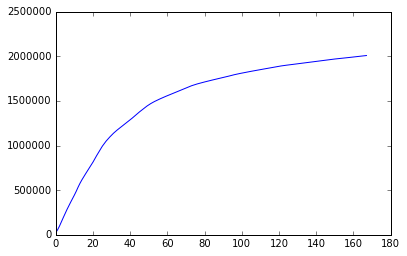

In [87]:
print row_data_views[24].std()
print row_data_views[72].std()
print row_data_views[168].std()

py.plot( list( row_data_views.std() ) ) 
py.show()

In [88]:
print list(row_data_views.values)[0][1:]

[0 48059 61152 70036 77636 84999 91436 96926 101260 105229 108673 111748
 114576 116909 118761 120096 121465 122625 123783 124872 126123 127324
 128606 129788 131026 131980 132861 133657 134323 134963 135572 136215
 136868 137447 138096 138703 139141 139460 139704 139871 140076 140204
 140282 140378 140470 140596 140766 141023 141204 141374 141524 141705
 141833 141930 142027 142186 142303 142388 142534 142644 142759 142827
 142869 142959 142995 143041 143065 143094 143118 143145 143176 143270
 143304 143381 143446 143505 143563 143614 143682 143746 143791 143821
 143889 143944 143993 144026 144063 144096 144118 144140 144154 144164
 144181 144194 144212 144224 144263 144287 144304 144324 144361 144381
 144403 144421 144465 144523 144540 144590 144684 144734 144785 144824
 144849 144872 144889 144909 144932 144958 144978 144997 145016 145050
 145095 145128 145152 145175 145199 145212 145233 145289 145311 145344
 145367 145398 145449 145460 145479 145510 145524 145545 145557 145570
 145

Below I display how views evolved with time for one movie.

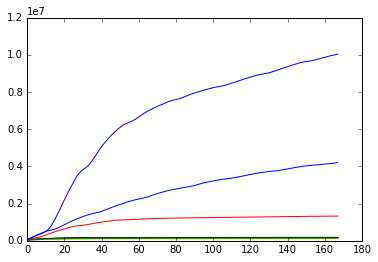

<function __main__.plot_one_row_data_views_10>

In [89]:
def plot_one_row_data_views_10( movie_number_10 ):
    for movie_number in range( movie_number_10, movie_number_10 + 9 ):
        py.plot( list( row_data_views.values )[ movie_number ][ 1: ] ) 
    py.show()

interact( plot_one_row_data_views_10, movie_number_10 = ( 0, int( len( row_data_views ) ) / 10 - 1, 1 ) )

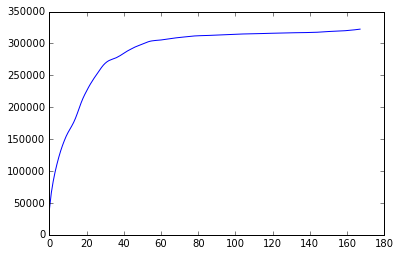

<function __main__.plot_one_row_data_views>

In [90]:
def plot_one_row_data_views( movie_number ):
    py.plot( list( row_data_views.values )[ movie_number ][ 1: ] ) 
    py.show()

interact( plot_one_row_data_views, movie_number = ( 0, len( row_data_views ) - 1, 1 ) )

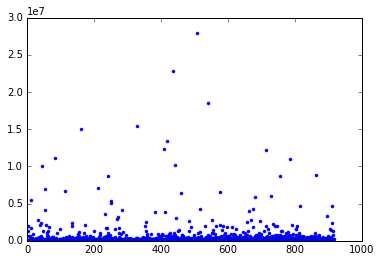

In [91]:
py.plot( list( row_data_views[168].values.T ), "." ) 
py.show()

### **Comments / observations:**
- On average views(time) change like log(time)

## 2) Plot the distribution of the v(168). How would you describe the distribution of the views?

### Note: 
- I can calculate mean and variance in oredr to describe distribution of the views.

### Below preparation of data for histogram of v(168)

In [92]:
#py.hist( list( row_data_views[168].values )
print row_data_views[168]

0       146880
1      1974771
2       663352
3      1254839
4       114546
5       153338
6       112673
7        68607
8       709488
9       256805
10     5449679
11     1676635
12      139682
13      410059
14      334543
15      284418
16      197670
17      928182
18      155422
19      193101
20       64838
21      134037
22      145071
23      116338
24       81784
25      389813
26      203610
27       41492
28      110639
29       95565
        ...   
886     277788
887     101480
888     285513
889     136782
890     142452
891     151547
892     239958
893     339166
894    3304682
895     360859
896     347231
897     393267
898     110530
899     592455
900     570081
901     214811
902     160228
903     153989
904    1541960
905     164318
906    1458192
907     222593
908     467242
909     117536
910    2358912
911    4686390
912    1255286
913     242045
914     808912
915     200418
Name: 168, dtype: int64


In [93]:
print row_data_views[168].values

[  146880  1974771   663352  1254839   114546   153338   112673    68607
   709488   256805  5449679  1676635   139682   410059   334543   284418
   197670   928182   155422   193101    64838   134037   145071   116338
    81784   389813   203610    41492   110639    95565   271082   123393
   380260  2781037   160025   514559   168967   106028  2165841   285675
   676956   146914  2378930   135159   335545 10033455   186092  1328222
   133050   173746   117880   178968  4201204   148792  6928848  2127058
   175620   166457   710206  1071176   165980   287248   591230  1320340
    99542    41217  1817307   152697   240751   209141   327714    66475
   161326    82729   150613   502011   169015   468404   493211   148098
   242583   277375 11138435   233308   230329   340733   127983   106941
  1086282    77870    66474   115687   119618    81222   117589    79910
   305204   240703   245529  1647461   218440   226917    79804   159486
   161048    69499   177882    95325   364100    86

### Below histogram of v(168)

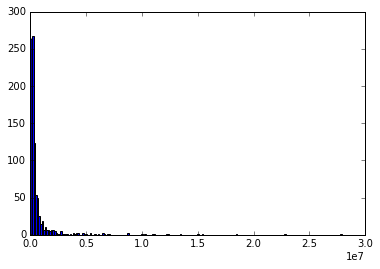

In [94]:
py.hist( list( row_data_views[168].values ), bins = 200 )
py.show()

### Distribution description:

Mean: 743209.837336
Median: 252287.0
Standard deviation: 2007963.83121


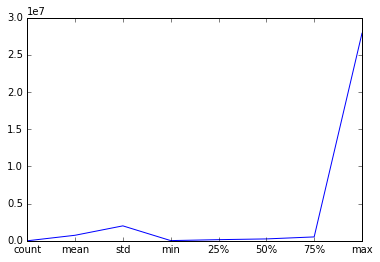

In [95]:
print "Mean: " + str( row_data_views[168].mean() )
print "Median: " + str( row_data_views[168].median() )
print "Standard deviation: " + str( row_data_views[168].std() )

#row_data_views.describe().T.drop('count', axis=1).plot()
row_data_views[168].describe().plot()

### Notes:

- big disproportion between min and maximum value. 

### Below improved hostogram

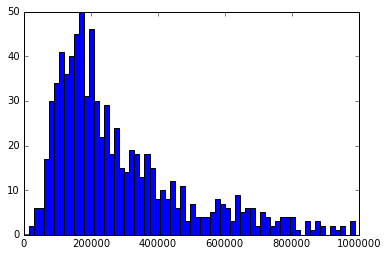

In [96]:
py.xlim([0, 1000000])
bins = range( 0, 1000000, 15000 )
py.hist( list( row_data_views[168].values ), bins )
py.show()

## 3) Plot the distribution of the log transformed v(168). Does it ring a bell?

### Question What mean log transformed? Why log transformed?

Log transformed means log( variable )

0       146880
1      1974771
2       663352
3      1254839
4       114546
5       153338
6       112673
7        68607
8       709488
9       256805
10     5449679
11     1676635
12      139682
13      410059
14      334543
15      284418
16      197670
17      928182
18      155422
19      193101
20       64838
21      134037
22      145071
23      116338
24       81784
25      389813
26      203610
27       41492
28      110639
29       95565
        ...   
886     277788
887     101480
888     285513
889     136782
890     142452
891     151547
892     239958
893     339166
894    3304682
895     360859
896     347231
897     393267
898     110530
899     592455
900     570081
901     214811
902     160228
903     153989
904    1541960
905     164318
906    1458192
907     222593
908     467242
909     117536
910    2358912
911    4686390
912    1255286
913     242045
914     808912
915     200418
Name: 168, dtype: int64


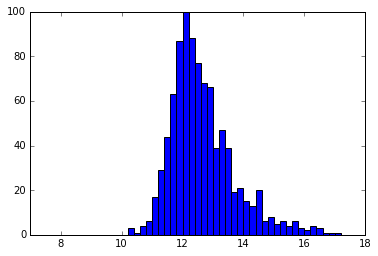

In [97]:
py.xlim( [ 7, 18 ] )

print row_data_views[168]

bins = np.arange( 0, 30, 0.2 )

py.hist( list( [ np.log( x ) for x in row_data_views[ 168 ].values ] ), bins )
py.show()

### Conclusions:
- It looks like a gausian distribution

- It may be good to check normality of the plot.

## (4) To improve the generalization and performance of your prediction algorithm, you can remove the so-called outliers from the dataset. To that end, compute the mean value μ and standard deviation σ of the log transformed v(168). Remove from the dataset data for videos where v(168) does not fit within 3σ rule.

In [98]:
log_transformed_list_v_168 = list( [ np.log( x ) for x in row_data_views[ 168 ].values ] )

mean_log_views_168 = np.mean( log_transformed_list_v_168 )
print "mean: " + str( mean_log_views_168 )
standard_deviation_log_views_168 = np.std( log_transformed_list_v_168 )
print "standard deviation: " + str( standard_deviation_log_views_168 )

mean: 12.6547190395
standard deviation: 1.06420054268


### Comment:
- Why can I transform distribution and use 3 signma rule? Why 3 sigma rule works here?

Assuming the v(168) is approximately normally distributed I can say that every item that exceeds 3 sigma has very low probability. I can remove the item from dataset.

### Below I compute new dataframe row_data_views_log_transformed_3_sigma with values v(168) that satisfy 3 sigma rule. ( I remove outliers from dataset ).

In [99]:
print row_data_views[ 168 ]

row_data_views_3_sigma = row_data_views[ ( np.log( row_data_views[ 168 ] ) < 
                                    mean_log_views_168 + 3 * standard_deviation_log_views_168 ) & ( 
        np.log( row_data_views[ 168 ] ) > mean_log_views_168 - 3 * standard_deviation_log_views_168 ) ]

row_data_views_3_sigma.reset_index(drop=True, inplace = True)
print row_data_views_3_sigma

0       146880
1      1974771
2       663352
3      1254839
4       114546
5       153338
6       112673
7        68607
8       709488
9       256805
10     5449679
11     1676635
12      139682
13      410059
14      334543
15      284418
16      197670
17      928182
18      155422
19      193101
20       64838
21      134037
22      145071
23      116338
24       81784
25      389813
26      203610
27       41492
28      110639
29       95565
        ...   
886     277788
887     101480
888     285513
889     136782
890     142452
891     151547
892     239958
893     339166
894    3304682
895     360859
896     347231
897     393267
898     110530
899     592455
900     570081
901     214811
902     160228
903     153989
904    1541960
905     164318
906    1458192
907     222593
908     467242
909     117536
910    2358912
911    4686390
912    1255286
913     242045
914     808912
915     200418
Name: 168, dtype: int64
                                 0       1       2       3   

### Note
- I can see that outliers has been removed because row_data_views_log_transformed_3_sigma has 901 rows.

### Question
- In the above condition should it be < or <= ?

In [100]:
#for movie_number in range( len( row_data_views_3_sigma ) ):
#    if row_data_views_3_sigma.loc[ movie_number, 1 ] == 0:
#        row_data_views_3_sigma.loc[ movie_number, 1 ] = 0.0000001
        
row_data_views_3_sigma = row_data_views_3_sigma[ row_data_views_3_sigma[ 1 ] != 0 ]
        
print row_data_views_3_sigma[ 1 ]

1       41457
2       54229
3       61661
4       22581
5       20540
6       25320
7        9784
8       33013
9       19899
10      52320
11      40572
12      22302
13      30515
14      25119
15      22459
16      28694
17      39036
18      22295
19      24281
20      12564
21      14699
22      25222
23      13407
24      23359
25      37148
26      33548
27       8761
28      18645
29      15343
30      32433
        ...  
871     46330
872     18650
873     48897
874     25898
875     15986
876     33578
877     49925
878     59463
879    106835
880     58160
881     55417
882     64897
883     26997
884     37863
885     45970
886     41473
887     40193
888     35254
889    110909
890     34377
891     83709
892     42678
893     57627
894     27830
895    119680
896     87056
897     93774
898     44762
899     50474
900     46721
Name: 1, dtype: int64


### Note:
- Above code removed rows that have 0 in v(1). Now correlation coeficient for v(1) is closer to 1 (see below).

## (5) Compute correlation coefficients between the log-transformed v(n) for n = 1, 2, ..., 24 and v(168).

In [101]:
def correlation_log_transformed_views_168( movie_time ):
    log_transformed_list_3_sigma_v_168 = list( [ np.log( x ) for x in 
                                                row_data_views_3_sigma[ 168 ].values ] )
    
    log_transformed_list_3_sigma_v_movie_time = list( [ np.log( x ) for x in 
                                                  row_data_views_3_sigma[ movie_time ].values ] )
    
    return sy.pearsonr( log_transformed_list_3_sigma_v_168, log_transformed_list_3_sigma_v_movie_time )

#print correlation_log_transformed_views_168( 23 )

for movie_time in range( 1, 25 ):
    print "n = " + str( movie_time ) + " correlation: " + str( correlation_log_transformed_views_168( 
            movie_time )[ 0 ] )




n = 1 correlation: 0.691457739929
n = 2 correlation: 0.80428513487
n = 3 correlation: 0.838995756803
n = 4 correlation: 0.855475928963
n = 5 correlation: 0.868339850751
n = 6 correlation: 0.880170969899
n = 7 correlation: 0.890717574006
n = 8 correlation: 0.90072299515
n = 9 correlation: 0.909419082733
n = 10 correlation: 0.916145484704
n = 11 correlation: 0.921280702139
n = 12 correlation: 0.925990225798
n = 13 correlation: 0.930056092834
n = 14 correlation: 0.933836752804
n = 15 correlation: 0.937565305783
n = 16 correlation: 0.941020619478
n = 17 correlation: 0.944376573256
n = 18 correlation: 0.947192134821
n = 19 correlation: 0.949623369554
n = 20 correlation: 0.951821485219
n = 21 correlation: 0.953954288259
n = 22 correlation: 0.955945001379
n = 23 correlation: 0.957718902605
n = 24 correlation: 0.95938182332


### Remark:
- In the above the covariance for n = 1 is equal to nan. What is the cause of this?

It is caused by some values being 0 in v(1). I changed 0 to 0.0000001 to remove bugs. 

Probably standard deviation of log( v(n) ) = 0

In [102]:
print np.std( list( [ np.log( x ) for x in row_data_views_3_sigma[ 1 ].values ] ) )

0.608357253267


In [103]:
print np.mean( list( [  ( x - np.mean( row_data_views_3_sigma[ 1 ].values ) ) 
                for x in row_data_views_3_sigma[ 1 ].values ] ) )

-5.34628343637e-13


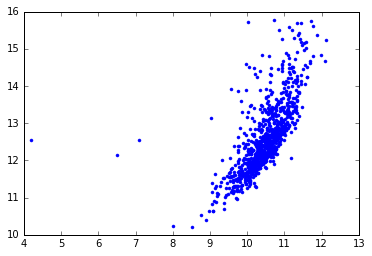

In [104]:
py.plot( list( [ np.log( x ) for x in row_data_views_3_sigma[ 1 ].values ] ), 
        list( [ np.log( x ) for x in row_data_views_3_sigma[ 168 ].values ] ), "." )
py.show()


### Remark:

- The plot above shows relationship between log transformed v(168) and v(1).

### Conclusions:
- Correlations coefficients are close to one except v(1). I can apply linear regression to predict future.

## (6) Randomly split the dataset into training and test sets (10% of the dataset should be used for testing, rest for training).

In [105]:
list_booleans_split = np.random.rand( len( row_data_views_3_sigma ) ) < 0.9
#print list_booleans_split

In [106]:
row_data_views_3_sigma_train = row_data_views_3_sigma[ list_booleans_split ]
row_data_views_3_sigma_test = row_data_views_3_sigma[ ~list_booleans_split ]

row_data_views_3_sigma_train.reset_index(drop=True, inplace = True)
row_data_views_3_sigma_test.reset_index(drop=True, inplace = True)

print row_data_views_3_sigma_train
print row_data_views_3_sigma_test

                                 0       1       2       3       4       5    \
0    341163402640457_880956415327817   41457   82351  121691  162281  202702   
1    341163402640457_881021215321337   61661  113998  156881  194734  225624   
2    341163402640457_881059645317494   22581   34326   42179   48756   54004   
3    341163402640457_881099615313497   20540   33373   42701   50692   57932   
4    341163402640457_881211871968938   25320   34662   40844   44902   48390   
5    341163402640457_881213071968818    9784   14718   16820   18857   20540   
6    341163402640457_881231368633655   33013   54891   70866   83587   95715   
7    341163402640457_881248731965252   19899   32366   41344   49673   59047   
8    341163402640457_881450058611786   52320   99506  143865  190600  238910   
9    341163402640457_881490075274451   40572   73043   99217  123030  144813   
10   341163402640457_881536535269805   30515   54983   72353   87577  101237   
11   341163402640457_881541551935970   2

## (7) Using training data, find linear regressor that minimizes Ordinary Least Squares (OLS) error function. It should take as the input v(n) and output v(168).

In [107]:
def calculate_linear_regressor( movie_number ):
    regr = linear_model.LinearRegression( fit_intercept=True )
    
    regr.fit(  np.reshape( list( [ np.log( x ) for x in row_data_views_3_sigma_train[ movie_number ].values ] ), 
                              ( len( row_data_views_3_sigma_train[ movie_number ].values ), 1 ) ), 
             list( [ np.log( x ) for x in row_data_views_3_sigma_train[ 168 ].values ] ) )
    
    return regr


print "Coefficient( n = 3 ): " + str( calculate_linear_regressor( 3 ).coef_ )


Coefficient( n = 3 ): [ 1.32238576]


## (8) Extend the above linear regressor with multiple inputs, that is it for a given time n the regressor should take an array of view counts preceding time n: {v(i)}

In [113]:
def calculate_linear_regressor_multiple_inputs( movie_number ):
    regr = linear_model.LinearRegression( fit_intercept=True )
    input_views_list = []
    for movie_number_input in range( 1, movie_number + 1 ):
        input_views_list.append( [ np.log( x ) for x in 
                                                   row_data_views_3_sigma_train[ movie_number_input ].values ] )
    
    print input_views_list
    
    input_views_list = np.array( input_views_list )
    input_views_list = input_views_list.reshape( len( row_data_views_3_sigma_train[ 1 ].values ), movie_number )
    
    print input_views_list
                              
    regr.fit(  input_views_list, list( [ np.log( x ) for x in row_data_views_3_sigma_train[ 168 ].values ] ) )
    
    return regr

print calculate_linear_regressor_multiple_inputs( 3 ).coef_

[[10.632412024471595, 11.029406919278141, 10.024864123702642, 9.9301294834825491, 10.139349876258112, 9.1885036773670077, 10.404656702268806, 9.8984247581936664, 10.865133986131081, 10.610833452495886, 10.325973644978596, 10.019446703703723, 10.264443320658335, 10.572239576261351, 10.012117717061576, 10.097449430486758, 9.4385908606585378, 9.5955347432419877, 10.13547190851582, 9.5035322376015614, 10.058737627806687, 10.522665212895898, 10.420732528104303, 9.833333292612922, 9.6384146229452057, 10.386931701960881, 10.122261571332395, 10.215557313044739, 11.094390314766315, 10.367158673708655, 10.917503726936127, 9.9709592676511409, 9.6271409897480922, 9.9606237439069378, 10.490218104391584, 10.674174310551491, 12.091256454434792, 10.104549080704135, 10.690580345938601, 10.411960410718521, 10.608019677962638, 9.8336014250719614, 10.103485294343026, 10.477851197106107, 10.945035540582561, 10.301491562412671, 11.71109576431852, 10.944029246748141, 10.222958947477316, 10.412531590219688, 1

## (9) To evaluate the proposed predictors, compute mean Relative Squared Error (mRSE)

In [109]:
#print calculate_linear_regressor_multiple_inputs( 1 ).predict( row_data_views_3_sigma_test.loc[ 1, 3 ] )

def calculate_mRSE_multiple( movie_number ):
    
    regr = calculate_linear_regressor_multiple_inputs( movie_number )
    
    mRSE_counter = 0
    
    for movie_number_id in range( len( row_data_views_3_sigma_test ) ):
        
        input_movie_views = []
        for movie_time in range( 1, movie_number + 1 ):
            input_movie_views.append( np.log( row_data_views_3_sigma_test.loc[  movie_number_id, movie_time ] ) )
            
        input_movie_views = np.array( input_movie_views )
        input_movie_views = input_movie_views.reshape( 1, len( input_movie_views ) )
            
        #print np.exp( regr.predict( input_movie_views ) )
        #print row_data_views_3_sigma_test.loc[ movie_number_id, 168 ]
        
        mRSE_counter = mRSE_counter + ( ( np.exp( regr.predict( input_movie_views ) ) / 
                                       row_data_views_3_sigma_test.loc[ movie_number_id, 168 ] ) - 1 )**2
        
    return mRSE_counter / len( row_data_views_3_sigma_test )

print calculate_mRSE_multiple( 4 )
    

[ 1.04868427]


## (10) Plot the mRSE values for n ∈ (1, 24) computed on the test dataset.

In [110]:
def calculate_mRSE( movie_time ):
    
    regr = calculate_linear_regressor( movie_time )
    
    mRSE_counter = 0
    
    for movie_number_id in range( len( row_data_views_3_sigma_test ) ):
        
        input_movie_views = []
        input_movie_views.append( np.log( row_data_views_3_sigma_test.loc[  movie_number_id, movie_time ] ) )
            
        input_movie_views = np.array( input_movie_views )
        input_movie_views = input_movie_views.reshape( 1, len( input_movie_views ) )
            
        #print np.exp( regr.predict( input_movie_views ) )
        #print row_data_views_3_sigma_test.loc[ movie_number_id, 168 ]
        
        mRSE_counter = mRSE_counter + ( ( np.exp( regr.predict( input_movie_views ) ) / 
                                       row_data_views_3_sigma_test.loc[ movie_number_id, 168 ] ) - 1 )**2
        
    return mRSE_counter / len( row_data_views_3_sigma_test )

print calculate_mRSE( 1 )

[ 0.2932581]


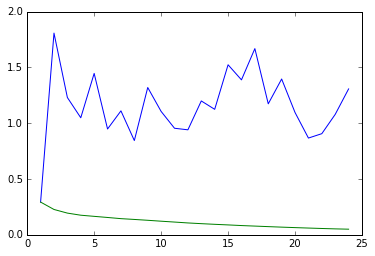

In [111]:
movies_time = range(1, 25)
mRSE_list_multiple = [ calculate_mRSE_multiple(x) for x in movies_time ]
mRSE_list = [ calculate_mRSE(x) for x in movies_time ]

py.plot( movies_time, mRSE_list_multiple )
py.plot( movies_time, mRSE_list )
py.show()

## Remarks:
- Bug in multiple input regression. 
- Two curves should start from the same point
- Linear regression shows more realistic values